In [1]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
from mpl_toolkits.mplot3d import Axes3D
import soda

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
# First guess

In [88]:
MW_halo_mass= 1.5E12
a = 18.54
M_disk = 5.78E10
M_bulge = 1.41E10
CC = 15
#host_model = ['NFW', MW_halo_mass, a, CC]
#disk_params = [M_disk, 3.5, 0.68]
#bulge_params = [M_bulge, 0.7]
#alpha = [0,0]
#d_t = 0.001
#LMC_mod = ['hernquist', 1E11, 3]

pos_host = np.array([0,0,0])
vel_host = np.array([0,0,0])
host_model = ['NFW', 1.2E12, 261, CC]
disk_params = [M_disk, 3.5, 0.68]
bulge_params = [M_bulge, 0.7]
alpha = [0, 0.6]
time = 5.0
#d_t = [0.1, 0.01, 0.001]

In [89]:
t, sat_R, sat_V, host_R, host_V = soda.leapfrog.integrate_sat(3, pos_host, vel_host,
                                                              host_model, disk_params, bulge_params,
                                                              lmc_model='LMC4',
                                                              direction=1,
                                                              alpha=alpha,)

using the  LMC4
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0


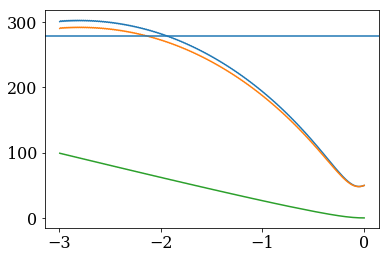

In [90]:
plot(t, np.sqrt((sat_R[:,0])**2 + (sat_R[:,1])**2 + (sat_R[:,2])**2))
plot(t, np.sqrt((sat_R[:,0]-host_R[:,0])**2 + (sat_R[:,1]-host_R[:,1])**2 + (sat_R[:,2]-host_R[:,2])**2))
plot(t, np.sqrt((host_R[:,0])**2 + (host_R[:,1])**2 + (host_R[:,2])**2))
axhline(278)

In [71]:
# Function that reads the data from the Analytic integration
#Galactocentic distances and velocities
def reading_data(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    t = host[:,0] 
    # Defining galactocentric distances and velocities
    x = sat[:,1] - host[:,1] 
    y = sat[:,2] - host[:,2] 
    z = sat[:,3] - host[:,3] 

    vx = sat[:,4] - host[:,4] 
    vy = sat[:,5] - host[:,5] 
    vz = sat[:,6] - host[:,6]        

    Rgal = np.sqrt(x**2.0 + y**2.0 + z**2.0)
    Vgal = np.sqrt(vx**2.0 + vy**2.0 + vz**2.0)
    
    return t, x, y, z, vx, vy, vz, Rgal, Vgal

# Host coordinates and velocities
def data_host(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    return host[:,1], host[:,2], host[:,3], host[:,4], host[:,5], host[:,6]

# Satellite coordinates and velocities
def data_sat(snap_name):
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    return sat[:,1], sat[:,2], sat[:,3], sat[:,4], sat[:,5], sat[:,6]

#ICs
def ICs(Rgal, cut, x, y, z, vx, vy, vz, t):
    Rcut = np.where(Rgal>=cut)[0]
    return Rgal[Rcut[0]], x[Rcut[0]], y[Rcut[0]], z[Rcut[0]], vx[Rcut[0]], vy[Rcut[0]], vz[Rcut[0]], t[Rcut[0]]

#Function that reads the N-body sumulation orbit
def reading_Nbody(snap_name):
    data = np.loadtxt('orbits/' + snap_name)
    time = data[:,0]
    Rgal = data[:,1]
    x_sat= data[:,2]
    y_sat = data[:,3]
    z_sat = data[:,4]
    x_gal = data[:,5]
    y_gal = data[:,6]
    z_gal = data[:,7]
    Vgal = data[:,8]
    vx_sat = data[:,9]
    vy_sat = data[:,10]
    vz_sat = data[:,11]
    vx_gal = data[:,12]
    vy_gal = data[:,13]
    vz_gal = data[:,14]
    return time, Rgal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal

def best_values(t, x, y, z, vx, vy, vz):
    """
    Computes the closes value of the N-body orbit to the observed present day LMC positions
    and velocities.
    
    """
    x_obs = -1
    y_obs = -41
    z_obs = -28
    vx_obs = -57
    vy_obs = -226
    vz_obs = 221
    Robs = np.sqrt((x_obs-x)**2.0 + (y_obs-y)**2.0 + (z_obs-z)**2.0)
    index = np.where(Robs == min(Robs))[0]
    
    sigma_vx = 13
    sigma_vy = 15
    sigma_vz = 19
    
    dx = x_obs - x[index]
    dy = y_obs - y[index]
    dz = z_obs - z[index]
    
    dvx = vx_obs - vx[index]
    dvy = vy_obs - vy[index]
    dvz = vz_obs - vz[index]
    
    print('Dr = ', dx, dy, dz)
    print('Dv = ', dvx, dvy, dvz)
    
    return t[index], x[index], y[index], z[index], vx[index], vy[index], vz[index]

In [64]:
#tgal1, xgal1, ygal1, zgal1, vxgal1, vygal1, vzgal1, Rgal1, Vgal1 = reading_data('lmc4_MWHern1')
tNB, RgalNB, xsatNB, ysatNB, zsatNB, xgalNB, ygalNB, zgalNB, vgalNB, vxsatNB, \
vysatNB, vzsatNB, vxgalNB, vygalNB, vzgalNB = reading_Nbody('LMC4_H0.txt')

In [65]:
ric1, xic1, yic1, zic1, vxic1, vyic1, vzic1, tic1 = ICs(Rgal1, 280, xgal1, ygal1, zgal1, vxgal1, vygal1, vzgal1, tgal1)

In [66]:
RgNB = np.sqrt((xgalNB-xsatNB)**2.0 + (ygalNB - ysatNB)**2.0 + (zgalNB-zsatNB)**2.0)

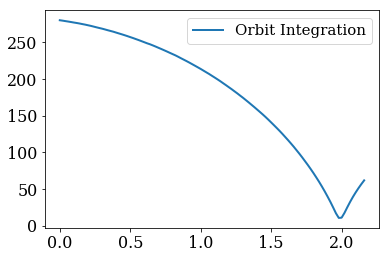

In [85]:
plot(tNB, RgNB, lw=2, label='Orbit Integration')

#plot(tNB+tic1, RgNB, lw=2, label='N-body')
legend(fontsize=15)

In [68]:
print(xsatNB[0]-xgalNB[0])
print(ysatNB[0]-ygalNB[0])
print(zsatNB[0]-zgalNB[0])

20.338115
266.912184
82.080739


In [72]:
best_values(tNB, xsatNB-xgalNB, ysatNB-ygalNB, zsatNB-zgalNB, vxsatNB-vxgalNB, vysatNB-vygalNB, 
            vzsatNB-vzgalNB)

Dr =  [ 11.347663] [-15.422458] [-1.246124]
Dv =  [ 91.788495] [-92.513942] [ 508.118996]


(array([ 2.08]),
 array([-12.347663]),
 array([-25.577542]),
 array([-26.753876]),
 array([-148.788495]),
 array([-133.486058]),
 array([-287.118996]))

In [91]:
print(xsatNB[-1]-xgalNB[-1])
print(ysatNB[-1]-ygalNB[-1])
print(zsatNB[-1]-zgalNB[-1])

print(vxsatNB[-1]-vxgalNB[-1])
print(vysatNB[-1]-vygalNB[-1])
print(vzsatNB[-1]-vzgalNB[-1])

-22.170891
-34.697616
-45.878686
-107.276768
-97.023941
-208.219453


In [104]:
MW_halo_mass= 1.5E12
a = 18.54
M_disk = 5.78E10
M_bulge = 1.41E10
CC = 15
#host_model = ['NFW', MW_halo_mass, a, CC]
#disk_params = [M_disk, 3.5, 0.68]
#bulge_params = [M_bulge, 0.7]
#alpha = [0,0]
#d_t = 0.001
#LMC_mod = ['hernquist', 1E11, 3]

sat_model = ['hernquist', 1E11, 12.7]
pos_sat = [-22.17, -34.69, -45.87]
vel_sat = [-107.27, -97.02, -208.21]
pos_host = np.array([0,0,0])
vel_host = np.array([0,0,0])
host_model = ['NFW', 1.2E12, 261, CC]
disk_params = [M_disk, 3.5, 0.68]
bulge_params = [M_bulge, 0.7]
alpha = [0, 0.35]
time = 5.0
#d_t = [0.1, 0.01, 0.001]
t_nb, sat_R_nb, sat_V_nb, host_R_nb, host_V_nb = soda.leapfrog.integrate_sat(3, pos_host, vel_host,
                                                              host_model, disk_params, bulge_params,
                                                              satellite_model=sat_model,
                                                              pos_sat=pos_sat, vel_sat=vel_sat,
                                                              direction=1,
                                                              dt=0.0001,
                                                              alpha=alpha)

Host:  0.0 0.0 0.0
Satellite 1 : -22.17 -34.69 -45.87


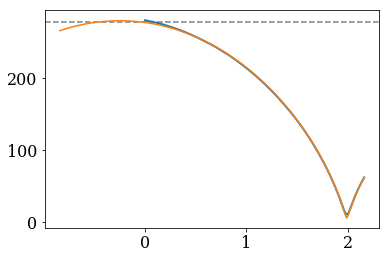

In [105]:
axhline(278, ls='--', c='k', alpha=0.5)
plot(tNB, RgNB, lw=2, label='Orbit Integration')
plot(t_nb+tNB[-1], np.sqrt((sat_R_nb[:,0]-host_R_nb[:,0])**2 + (sat_R_nb[:,1]-host_R_nb[:,1])**2 + 
                   (sat_R_nb[:,2]-host_R_nb[:,2])**2))


In [122]:
x_obs = -1
y_obs = -41
z_obs = -28
vx_obs = -57
vy_obs = -226
vz_obs = 221

pos_lmc = [x_obs, y_obs, z_obs]
vel_lmc = [vx_obs, vy_obs, vz_obs]
alpha = [0, 0.55]


In [123]:
t_nb, sat_R_nb, sat_V_nb, host_R_nb, host_V_nb = soda.leapfrog.integrate_sat(3, pos_host, vel_host,
                                                                             host_model, disk_params, 
                                                                             bulge_params,
                                                                             satellite_model=sat_model,
                                                                             pos_sat=pos_lmc, 
                                                                             vel_sat=vel_lmc,
                                                                             direction=1,
                                                                             dt=0.001,
                                                                             alpha=alpha)

Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0


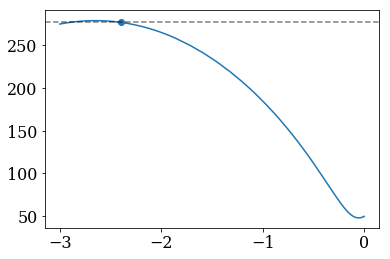

In [132]:
plot(t_nb, np.sqrt((sat_R_nb[:,0]-host_R_nb[:,0])**2 + (sat_R_nb[:,1]-host_R_nb[:,1])**2 + 
    (sat_R_nb[:,2]-host_R_nb[:,2])**2))
axhline(278, ls='--', c='k', alpha=0.5)
scatter(t_nb[-600], np.sqrt((sat_R_nb[-100,0]-host_R_nb[-100,0])**2 + (sat_R_nb[-100,1]-host_R_nb[-100,1])**2 + 
    (sat_R_nb[-100,2]-host_R_nb[-100,2])**2))

In [133]:
print(sat_R_nb[-600,0]-host_R_nb[-600,0])
print(sat_R_nb[-600,1]-host_R_nb[-600,1])
print(sat_R_nb[-600,2]-host_R_nb[-600,2])

print(sat_V_nb[-600,0]-host_V_nb[-600,0])
print(sat_V_nb[-600,1]-host_V_nb[-600,1])
print(sat_V_nb[-600,2]-host_V_nb[-600,2])


18.4362195862
260.960849036
91.3166729636
10.3259046113
4.4655159208
-62.6836559714
